<a href="https://colab.research.google.com/github/aboutvitor/aboutvitor/blob/main/Portal_da_Transpar%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO ANÁLISE DE DADOS
# Portal da Transparência (2024)

Dados disponíveis em "https://portaldatransparencia.gov.br/download-de-dados"

Importação dos dados

In [18]:
dados_viagem = "/content/drive/MyDrive/Programação.Dados/Portal da transparência/2024_Viagem.csv"
dados_passagem = "/content/drive/MyDrive/Programação.Dados/Portal da transparência/2024_Passagem.csv"

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.float_format','{:.2f}'.format)

df_viagens = pd.read_csv(dados_viagem, encoding="Windows-1252", sep=";", decimal=",")
df_passagem = pd.read_csv(dados_passagem, encoding="Windows-1252", sep=";", decimal=",")

In [20]:
# Tratamento de valores ausentes
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Não informado')


# Conversão de tipos de dados
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

In [21]:
#Inclusão de "Despesas" ao relatório
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos'] - df_viagens['Valor devolução']

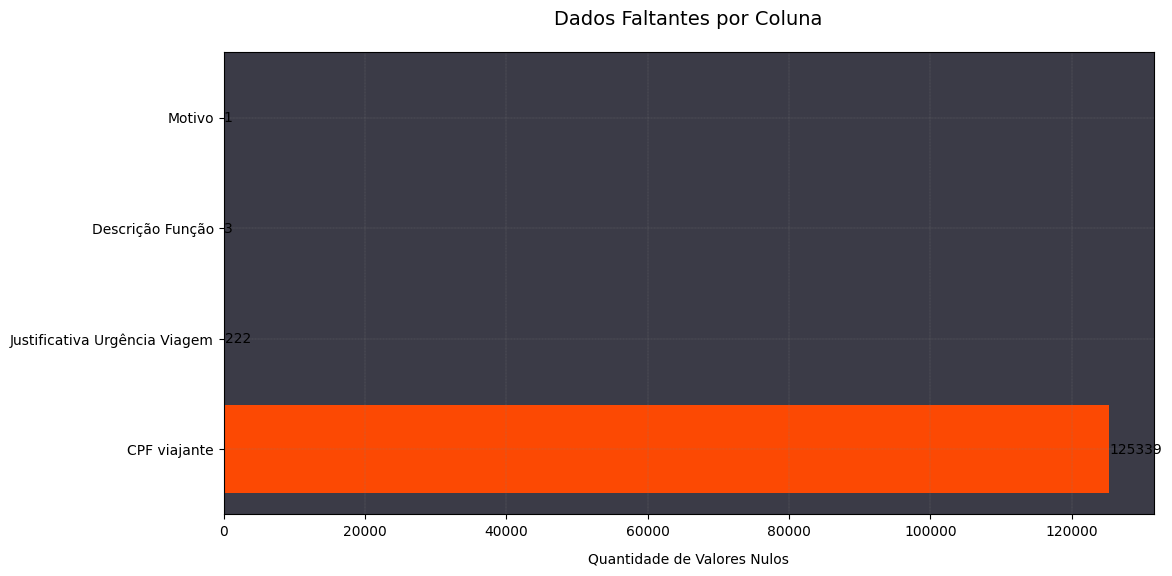

In [22]:
# Verificação de dados nulos
dados_nulos = df_viagens.isnull().sum().sort_values(ascending=False)
dados_nulos = dados_nulos[dados_nulos > 0]  # Filtra apenas colunas com valores nulos

# Configuração do gráfico
plt.figure(figsize=(12, 6))
bars = plt.barh(dados_nulos.index, dados_nulos.values, color='#fc4903')

# Adiciona os valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             va='center', ha='left', fontsize=10)

# Formatação do gráfico
plt.title('Dados Faltantes por Coluna', pad=20, fontsize=14)
plt.xlabel('Quantidade de Valores Nulos', labelpad=10)
plt.grid(color='gray',linestyle="--",linewidth=0.2)
plt.gca().set_facecolor('#3b3b47')
plt.show()


In [23]:

print("Impacto os dados faltantes tem na análise desses dados:")
print(
'''
Os dados faltantes podem ter um impacto significativo na análise dos dados do portal da transparência.
A visualização mostra que as colunas 'Valor devolução', 'Valor outros gastos', 'Valor passagens' e 'Valor diárias'
possuem um número considerável de valores nulos.

Impactos possíveis:

1.  **Distorção de estatísticas:** A média, mediana e outras estatísticas descritivas podem ser enganosas se calculadas com base em dados incompletos.
Por exemplo, a média do 'Valor diárias' seria subestimada se os valores nulos representassem diárias com valor zero ou não informado.
2.  **Viés na análise:** Se os dados faltantes não forem aleatórios (ou seja, se a ausência de dados estiver relacionada a alguma característica específica), a análise pode apresentar viés.
Por exemplo, se 'Valor devolução' for frequentemente nulo para viagens de menor valor, a análise de devoluções seria incompleta.
3.  **Perda de poder estatístico:** A exclusão de linhas com valores nulos (listwise deletion) reduz o tamanho da amostra, diminuindo o poder estatístico da análise e a capacidade de detectar relacionamentos significativos.
4.  **Análise de despesas incompleta:** A coluna 'Despesas', calculada a partir de 'Valor diárias', 'Valor passagens', 'Valor outros gastos' e 'Valor devolução', será afetada pelos valores nulos nessas colunas. O cálculo de 'Despesas' para linhas com valores nulos em suas componentes resultará em `NaN`, tornando a análise de despesas total incompleta.

Para lidar com esses dados faltantes, algumas abordagens poderiam ser consideradas:

*   **Imputação:** Preencher os valores nulos com valores estimados (média, mediana, ou métodos mais sofisticados como KNN imputation ou MICE). A escolha do método de imputação deve ser cuidadosa e considerar a natureza dos dados.
*   **Análise da razão da ausência:** Investigar por que os dados estão faltando. Há um padrão? A ausência de dados está relacionada a alguma variável?
*   **Considerar a exclusão (com cautela):** Se o número de valores nulos em uma coluna for muito alto e a imputação não for apropriada, a coluna pode ser considerada para exclusão da análise, mas isso deve ser feito com cautela e com justificativa.
*   **Análise sensível a dados faltantes:** Utilizar métodos de análise que podem lidar com dados faltantes.

No contexto da análise de gastos com viagens, a imputação ou uma análise cuidadosa da natureza dos dados faltantes seria crucial para obter insights precisos sobre os gastos e identificar possíveis padrões ou anomalias.
A alta quantidade de nulos em colunas financeiras (`Valor diárias`, `Valor passagens`, etc.) sugere que a análise direta da coluna 'Despesas' ou dos valores individuais precisaria de tratamento adicional para ser confiável.
'''
)


Impacto os dados faltantes tem na análise desses dados:

Os dados faltantes podem ter um impacto significativo na análise dos dados do portal da transparência.
A visualização mostra que as colunas 'Valor devolução', 'Valor outros gastos', 'Valor passagens' e 'Valor diárias'
possuem um número considerável de valores nulos.

Impactos possíveis:

1.  **Distorção de estatísticas:** A média, mediana e outras estatísticas descritivas podem ser enganosas se calculadas com base em dados incompletos.
Por exemplo, a média do 'Valor diárias' seria subestimada se os valores nulos representassem diárias com valor zero ou não informado.
2.  **Viés na análise:** Se os dados faltantes não forem aleatórios (ou seja, se a ausência de dados estiver relacionada a alguma característica específica), a análise pode apresentar viés.
Por exemplo, se 'Valor devolução' for frequentemente nulo para viagens de menor valor, a análise de devoluções seria incompleta.
3.  **Perda de poder estatístico:** A exclusão de 

Órgaos com maior número de viagens

<Figure size 1000x400 with 0 Axes>

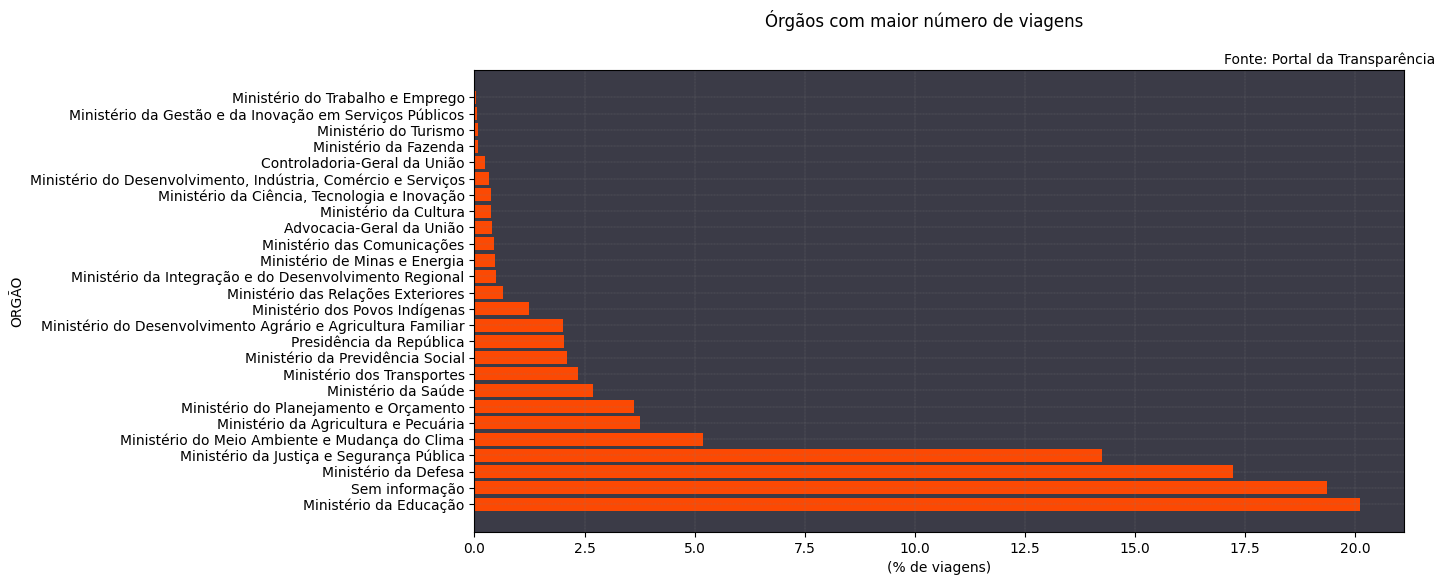

In [24]:
orgaos_qtd = (df_viagens['Nome do órgão superior'].value_counts(normalize=True)*100).reset_index(name='Quantidade (%)')

plt.figure(figsize=(10,4))
fig,ax = plt.subplots(figsize=(12,6))
ax.barh(orgaos_qtd['Nome do órgão superior'],orgaos_qtd['Quantidade (%)'], color='#fc4903')
ax.set_facecolor('#3b3b47')
plt.xlabel('(% de viagens)')
plt.grid(color='gray',linestyle="--",linewidth=0.2)
plt.figtext(0.75,0.89, 'Fonte: Portal da Transparência')
plt.ylabel('ORGÃO')
fig.suptitle('Órgãos com maior número de viagens')
plt.show()


Despesas por órgão

In [25]:
df_viagens.groupby('Nome do órgão superior')['Despesas'].sum().reset_index().sort_values(by='Despesas', ascending=False)

,Nome do órgão superior,Despesas
25,Sem informação,721597757.74
10,Ministério da Justiça e Segurança Pública,347260777.46
5,Ministério da Defesa,306338345.51
6,Ministério da Educação,273950367.42
18,Ministério do Meio Ambiente e Mudança do Clima,119746384.89
12,Ministério da Saúde,88288540.99
11,Ministério da Previdência Social,62325175.18
14,Ministério das Relações Exteriores,60146928.56
23,Ministério dos Transportes,52322379.07
24,Presidência da República,51699551.19


Orgãos com mais de 1% da ocorrência das viagens

In [26]:
viagens_por_orgao = (df_viagens['Nome do órgão superior'].value_counts(normalize=True)*100).reset_index(name='Quantidade (%)')
filtro_1_porcento = viagens_por_orgao['Quantidade (%)'] > 1

viagens_por_orgao[filtro_1_porcento]



,Nome do órgão superior,Quantidade (%)
0,Ministério da Educação,20.11
1,Sem informação,19.36
2,Ministério da Defesa,17.23
3,Ministério da Justiça e Segurança Pública,14.25
4,Ministério do Meio Ambiente e Mudança do Clima,5.19
5,Ministério da Agricultura e Pecuária,3.75
6,Ministério do Planejamento e Orçamento,3.62
7,Ministério da Saúde,2.68
8,Ministério dos Transportes,2.35
9,Ministério da Previdência Social,2.10


Gastos por Ministério


In [27]:
viagens_por_orgao = (df_viagens['Nome do órgão superior'].value_counts(normalize=True)*100).reset_index(name='Quantidade (%)')

In [28]:
filtro_ministerio = viagens_por_orgao['Nome do órgão superior'].str.startswith('Ministério')
viagens_por_orgao[filtro_ministerio]


,Nome do órgão superior,Quantidade (%)
0,Ministério da Educação,20.11
2,Ministério da Defesa,17.23
3,Ministério da Justiça e Segurança Pública,14.25
4,Ministério do Meio Ambiente e Mudança do Clima,5.19
5,Ministério da Agricultura e Pecuária,3.75
6,Ministério do Planejamento e Orçamento,3.62
7,Ministério da Saúde,2.68
8,Ministério dos Transportes,2.35
9,Ministério da Previdência Social,2.10
11,Ministério do Desenvolvimento Agrário e Agricu...,2.01


Cargos que gastaram mais de 10 milhões em viagens

In [29]:
viagens_por_cargo = df_viagens.groupby('Cargo')['Despesas'].sum().reset_index().sort_values(by='Despesas', ascending=False)

filtro_10M = viagens_por_cargo['Despesas']>= 10000000

viagens_por_cargo[filtro_10M]


,Cargo,Despesas
519,Não informado,1061296229.81
465,Informações protegidas por sigilo,392528120.06
596,PROFESSOR DO MAGISTERIO SUPERIOR,110914148.68
597,PROFESSOR ENS BASICO TECN TECNOLOGICO,51405480.59
715,TECNICO DO SEGURO SOCIAL,44108743.59
91,ANALISTA AMBIENTAL,35658500.06
230,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,32510548.02
411,ESP EM REGULACAO E VIGILANCIA SANITARIA,26554994.81
229,AUDITOR FISCAL FEDERAL AGROPECUARIO,24824783.51
133,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,20387705.07


Cargos e CPF's não transmitidos (PAREI AQUI)

In [30]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Não informado')

filtro_cargo = df_viagens['Cargo'] == 'Não informado'
quantidade_cargo = filtro_cargo.sum()
percentual_cargo = (quantidade_cargo / len(df_viagens)) * 100

print(f"\nAnálise de Dados Faltantes - Cargo:")
print(f"• Ocorrências sem informação: {quantidade_cargo}")
print(f"• Percentual do total: {percentual_cargo:.2f}%")

cpf_faltando = df_viagens['CPF viajante'].isna().sum()
percentual_cpf = (cpf_faltando / len(df_viagens)) * 100

print(f"\nAnálise de Dados Faltantes - CPF:")
print(f"• Ocorrências sem informação: {cpf_faltando}")
print(f"• Percentual do total: {percentual_cpf:.2f}%")

# Análise cruzada (onde ambos estão faltando)
ambos_faltando = ((df_viagens['Cargo'] == 'Não informado') &
                  (df_viagens['CPF viajante'].isna())).sum()

print(f"\nAnálise Cruzada:")
print(f"• Registros sem cargo E sem CPF: {ambos_faltando}")


Análise de Dados Faltantes - Cargo:
• Ocorrências sem informação: 295703
• Percentual do total: 38.25%

Análise de Dados Faltantes - CPF:
• Ocorrências sem informação: 125339
• Percentual do total: 16.21%

Análise Cruzada:
• Registros sem cargo E sem CPF: 89131


In [31]:
#Definição e formatação de colunas de datas no relatório
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens ['Período - Data de início'], format="%d/%m/%Y")
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'] , format="%d/%m/%Y")
df_viagens['Quantidade de dias'] = (df_viagens['Período - Data de fim']- df_viagens['Período - Data de início']).dt.days
df_viagens ['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()

Relação de gastos com a quantidade de dias

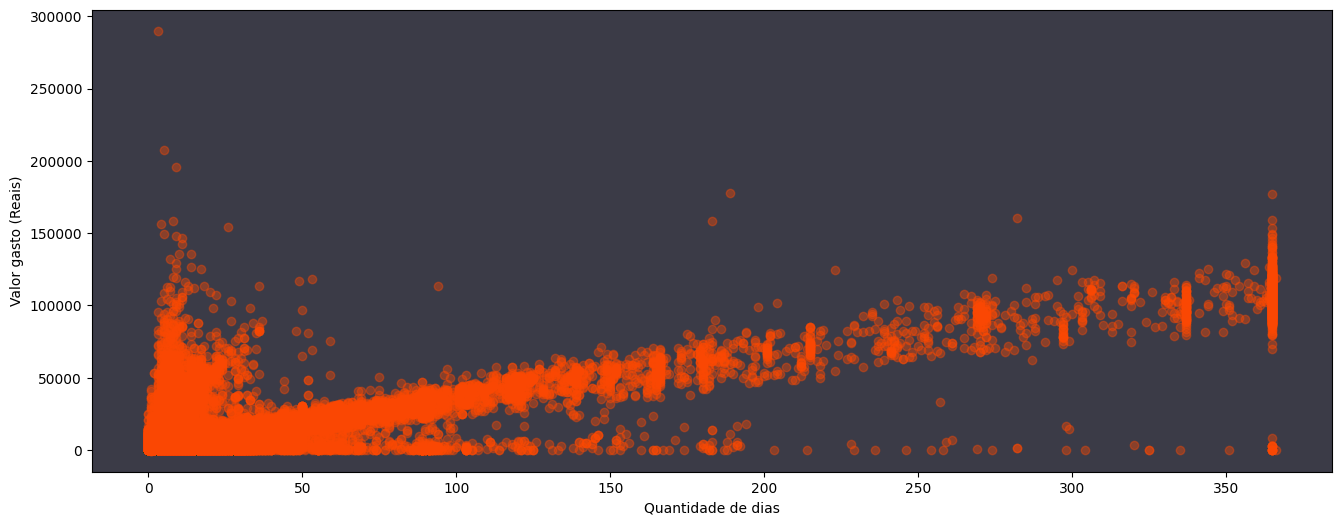

In [32]:
fig,ax = plt.subplots(figsize=(16,6))
ax.scatter(df_viagens['Quantidade de dias'], df_viagens['Despesas'], alpha=0.4, color='#fc4903')
ax.set_facecolor('#3b3b47')
plt.xlabel ('Quantidade de dias')
plt.ylabel ('Valor gasto (Reais)')
plt.show()

Passagens que custaram mais de 150 mil reais

In [33]:
filtro_mais_de_150k = df_viagens['Despesas']>150_000
df_viagens[filtro_mais_de_150k]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Quantidade de dias,Mês da viagem
1491,19608215,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID000200137,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-01-15,2024-07-16,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,137003.49,12154.78,0.00,8944.06,158102.33,183,January
6757,19661448,000028/24-12C,Realizada,SIM,Em continuidade a PCDP 542/23.,-1,Sem informação,-1,Sem informação,***.360.192-**,RAILANA BERENICE AMORAS OLIVEIRA,Não informado,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Macapá/AP, Brasília/DF, Brasília/...",Em complemento a PCDP 542/23 - CENTRO DE CUSTO...,117211.94,36122.52,0.00,0.00,153334.46,365,January
9681,19668216,000844/24-17C,Realizada,SIM,"Face o DECRETO Nº 11.348, DE 1º DE JANEIRO DE ...",-1,Sem informação,-1,Sem informação,***.468.361-**,BRUNO REZENDE CABRAL,Não informado,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Rio de Janeiro/RJ, Angra dos Reis...",Em continuidade a PCDP 051838/23 - Centro de C...,118425.85,58502.93,0.00,0.00,176928.78,365,January
13279,19673150,001658/24-11C,Realizada,SIM,"Face o DECRETO Nº 11.348, DE 1º DE JANEIRO DE ...",-1,Sem informação,-1,Sem informação,***.764.623-**,ALKIMAR SAMPAIO DE SOUZA,Não informado,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Manaus/AM, Tabatinga/AM, Manaus/A...",Em continuidade à PCDP: 27230/23. Centro de Cu...,118144.60,41329.59,0.00,0.00,159474.19,365,January
119328,19805066,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,-1,Sem informação,-1,Sem informação,NaN,Sem Informação,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-03-24,2024-12-31,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,93958.90,67091.46,822.73,0.00,160227.63,282,March
239430,19961140,010529/24-1C,Realizada,SIM,Conforme Nota Técnica em anexo.,22000,Ministério da Agricultura e Pecuária,22000,Ministério da Agricultura e Pecuária - Unidade...,***.693.051-**,IRAJA REZENDE DE LACERDA,Não informado,CCX-0118,CCX-0118,2024-05-24,2024-06-02,"Xangai/China, Shenzhen/China",Participar de reuniões e encontro governamenta...,14281.65,180718.90,0.00,860.85,195861.40,9,May
261976,19989596,014282/24,Não realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.639.875-**,OLGA MARIA SILVA EMBIRUCU,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,-1,Sem informação,2024-06-12,2024-06-15,Rio de Janeiro/RJ,Foco na identificação das soluções tecnológica...,0.00,290096.16,0.00,0.00,290096.16,3,June
328646,20073775,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006400272,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-07-07,2025-01-12,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,153371.34,12503.74,0.00,11755.96,177631.04,189,July
356900,20109417,001426/24-2C,Realizada,SIM,Ajuste de dados.,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.050.944-**,CELSO LUIZ NUNES AMORIM,Não informado,CCX-0118,CCX-0118,2024-07-16,2024-07-21,Washington/Estados Unidos da América,Encontro com autoridades dos Estados Unidos da...,7675.59,199689.55,0.00,532.33,207897.47,5,July
502162,20301922,010873/24-1C,Realizada,SIM,Alteração de forma intempestiva,36000,Ministério da Saúd

Quantidade de dias de viagem por órgão

In [34]:
qtd_viagem = df_viagens.groupby('Nome do órgão superior')['Quantidade de dias'].sum().reset_index().sort_values('Quantidade de dias', ascending=False)
print(qtd_viagem)

                               Nome do órgão superior  Quantidade de dias
25                                     Sem informação             1541660
10          Ministério da Justiça e Segurança Pública              765934
5                                Ministério da Defesa              639276
6                              Ministério da Educação              417879
18     Ministério do Meio Ambiente e Mudança do Clima              322089
11                   Ministério da Previdência Social              138745
22                     Ministério dos Povos Indígenas               97239
12                                Ministério da Saúde               95967
16  Ministério do Desenvolvimento Agrário e Agricu...               81768
19             Ministério do Planejamento e Orçamento               66800
2                Ministério da Agricultura e Pecuária               61395
23                         Ministério dos Transportes               50550
14                 Ministério das Rela

Resumo de analise (órgão)

In [35]:
(df_viagens.
 groupby('Nome do órgão superior')
 .agg(
     Gasto_por_orgao=('Despesas','mean'),
     Duracao_media=('Quantidade de dias','mean'),
     Despesas_totais=('Despesas','sum'),
     Destinos_frequentes=('Destinos', pd.Series.mode),
     ).sort_values('Gasto_por_orgao', ascending=False)
 .reset_index()
 )

,Nome do órgão superior,Gasto_por_orgao,Duracao_media,Despesas_totais,Destinos_frequentes
0,Ministério das Relações Exteriores,11777.35,8.68,60146928.56,Sem informação
1,Ministério do Turismo,8204.89,3.49,4939346.76,Belém/PA
2,Ministério da Fazenda,5406.38,1.55,3881783.48,São Paulo/SP
3,Ministério do Trabalho e Emprego,5399.42,2.87,1576631.68,Brasília/DF
4,Ministério da Gestão e da Inovação em Serviços...,4903.97,2.93,2025338.28,Brasília/DF
5,Sem informação,4822.26,10.30,721597757.74,Brasília/DF
6,Ministério de Minas e Energia,4479.86,2.90,16073723.04,São Paulo/SP
7,Ministério da Saúde,4253.84,4.62,88288540.99,Brasília/DF
8,Ministério das Comunicações,4215.18,3.52,14677255.65,Brasília/DF
9,Ministério dos Povos Indígenas,3947.96,10.11,37971484.00,Brasília/DF
